In [ ]:
import pandas as pd, numpy as np
import seaborn as sns
from preprocessing import readData

In [2]:
*_, dataDict = readData()
dataDict

{'history':        normalizedTs            datetime  funding_rate        price  \
 0        1741382100 2025-03-07 22:15:00  1.181300e-05  2153.187440   
 1        1741383000 2025-03-07 22:30:00  1.201200e-05  2140.738233   
 2        1741383900 2025-03-07 22:45:00  1.249900e-05  2139.641515   
 3        1741384800 2025-03-07 23:00:00  1.065300e-05  2124.887988   
 4        1741385700 2025-03-07 23:15:00 -1.700000e-07  2126.712972   
 ...             ...                 ...           ...          ...   
 12107    1752278400 2025-07-12 02:00:00  1.250000e-05  2957.514605   
 12108    1752279300 2025-07-12 02:15:00  1.250000e-05  2954.740054   
 12109    1752280200 2025-07-12 02:30:00  1.250000e-05  2939.979789   
 12110    1752281100 2025-07-12 02:45:00  1.250000e-05  2953.131413   
 12111    1752282000 2025-07-12 03:00:00  1.250000e-05  2953.209560   
 
         open_price   high_price    low_price  close_price  trades  \
 0      2125.933487  2153.187440  2125.933487  2153.187440      3

# Feature Engineering and Data Exploration

## Features to Engineer
* The log return of the current period
* SMA of the **last price** for a short time frame
* SMA of the **last price** for a long time frame
* Standard deviation of the **last price** for a short time frame
* Standard deviation of the **last price** for a long time frame

## Label Creation
The labels are created by binning the log of the next closing price over the current closing price and one hot encoding the results.

In [3]:
history = dataDict['history']
print(f'Missing {len(history[pd.isna(history.futureLogReturn)]) / len(history) :.2%} of log returns, {len(history)} observations remain')
history

Missing 17.92% of log returns, 12112 observations remain


,normalizedTs,datetime,funding_rate,price,open_price,high_price,low_price,close_price,trades,avgIndex,...,lastPrice,lastVol,pnlSell,pnlBuy,futureLogReturn,logReturn,longSMA,longStd,shortSMA,shortStd
0,1741382100,2025-03-07 22:15:00,1.181300e-05,2153.187440,2125.933487,2153.187440,2125.933487,2153.187440,30,2128.074806,...,2137.16,1.0000,-18.363837,0.000000,-0.005799,0.012738,NaN,NaN,NaN,NaN
1,1741383000,2025-03-07 22:30:00,1.201200e-05,2140.738233,2153.908790,2153.908790,2140.738233,2140.738233,7,2133.469126,...,2139.11,0.4700,-130.329716,-8.170312,-0.000512,-0.006133,NaN,NaN,NaN,NaN
2,1741383900,2025-03-07 22:45:00,1.249900e-05,2139.641515,2137.993935,2146.044043,2130.237873,2139.641515,16,2147.371246,...,2136.49,3.0000,24.781061,-28.569900,-0.006919,0.000770,NaN,NaN,NaN,NaN
3,1741384800,2025-03-07 23:00:00,1.065300e-05,2124.887988,2138.600411,2141.107391,2120.796531,2124.887988,19,2139.873086,...,2138.36,1.3600,-52.154765,-71.963353,0.000858,-0.006433,NaN,NaN,NaN,NaN
4,1741385700,2025-03-07 23:15:00,-1.700000e-07,2126.712972,2126.124556,2134.940397,2121.673116,2126.712972,45,2131.537010,...,2128.74,1.3900,-56.329300,23.035954,0.009744,0.000277,NaN,NaN,2137.7800,1.176690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12107,1752278400,2025-07-12 02:00:00,1.250000e-05,2957.514605,2958.754972,2966.007267,2953.273566,2957.514605,0,2959.103294,...,2962.71,0.1397,0.000000,0.000000,-0.000939,-0.000419,2979.120417,20.712026,2955.6000,8.209921
12108,1752279300,2025-07-12 02:15:00,1.250000e-05,2954.740054,2957.547978,2958.246819,2947.270472,2954.740054,5,2960.487109,...,2962.62,1.9884,0.000000,-46.029173,-0.005008,-0.000950,2977.985000,20.838499,2959.1550,7.110000
12109,1752280200,2025-07-12 02:30:00,1.250000e-05,2939.979789,2955.035659,2955.035659,2935.953348,2939.979789,1,2949.943248,...,2950.00,1.0000,0.000000,0.000000,0.004463,-0.005108,2976.845833,20.902598,2962.6875,0.045000
12110,1752281100,2025-07-12 02:45:00,1.250000e-05,2953.131413,2939.979789,2953.131413,2939.241136,2953.131413,10,2945.963598,...,2937.40,0.1397,-167.933829,0.000000,0.000026,0.004463,2975.285833,21.467046,2959.5100,6.340142


In [4]:
features = dataDict['features']
features

,funding_rate,price,open_price,high_price,low_price,close_price,trades,avgIndex,minVol,minPrice,...,maxPrice,lastPrice,lastVol,pnlSell,pnlBuy,logReturn,longSMA,longStd,shortSMA,shortStd
0,0.000013,2133.836725,2130.566875,2137.012792,2126.137986,2133.836725,0,2141.741098,0.0000,0.00,...,0.00,2142.87,1.4000,0.000000,0.000000,0.001534,2135.962778,8.578658,2137.7400,3.420000
1,0.000010,2139.407276,2131.522618,2139.962587,2131.522618,2139.407276,0,2141.741098,0.0000,0.00,...,0.00,2142.87,1.4000,0.000000,0.000000,0.003692,2136.200694,8.691739,2139.4500,3.949076
2,0.000013,2138.292765,2139.119919,2140.781385,2137.042713,2138.292765,3,2135.675184,2.5600,2132.99,...,2137.65,2136.38,1.3800,18.410028,0.000000,-0.000387,2136.357361,8.779898,2141.1600,3.420000
3,0.000013,2138.334718,2137.772306,2140.319806,2131.990166,2138.334718,1,2138.050106,3.3700,2137.45,...,2137.45,2137.45,3.3700,19.554849,0.000000,0.000263,2136.352778,8.779854,2141.2475,3.245000
4,0.000013,2148.752341,2139.129134,2149.248809,2136.113375,2148.752341,4,2136.984323,1.3900,2133.60,...,2139.64,2138.22,1.3900,4.215945,-3.273684,0.004489,2136.314861,8.772771,2139.8925,3.465760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,0.000013,2958.923312,2958.131649,2960.131482,2954.441769,2958.923312,0,2959.103294,0.0000,0.00,...,0.00,2962.71,0.1397,0.000000,0.000000,0.000268,2980.062500,20.445641,2952.4750,6.871339
9913,0.000013,2957.514605,2958.754972,2966.007267,2953.273566,2957.514605,0,2959.103294,0.0000,0.00,...,0.00,2962.71,0.1397,0.000000,0.000000,-0.000419,2979.120417,20.712026,2955.6000,8.209921
9914,0.000013,2954.740054,2957.547978,2958.246819,2947.270472,2954.740054,5,2960.487109,0.1715,2962.54,...,2962.62,2962.62,1.9884,0.000000,-46.029173,-0.000950,2977.985000,20.838499,2959.1550,7.110000
9915,0.000013,2939.979789,2955.035659,2955.035659,2935.953348,2939.979789,1,2949.943248,1.0000,2950.00,...,2950.00,2950.00,1.0000,0.000000,0.000000,-0.005108,2976.845833,20.902598,2962.6875,0.045000


-0.0: 2815
0.25: 1251
-0.25: 1193
0.5: 900
-0.5: 794
-0.75: 519
0.75: 506
-1.0: 316
1.0: 312
1.25: 219
-1.25: 199
1.5: 132
-1.5: 127
1.75: 89
-1.75: 79
-2.0: 62
2.0: 55
-2.25: 46
2.25: 41
2.75: 30
2.5: 28
-2.5: 26
-3.0: 22
3.0: 18
-2.75: 18
-3.5: 13
3.25: 9
3.5: 7
-3.25: 7
-4.25: 6
4.0: 6
3.75: 6
4.25: 6
-5.0: 5
5.0: 5
4.75: 4
5.25: 4
-4.5: 4
-3.75: 3
-5.5: 3
-5.25: 2
5.75: 2
-6.5: 2
-4.0: 2
-6.0: 2
-7.5: 2
7.0: 2
-5.75: 2
-6.25: 2
-8.75: 1
-9.25: 1
-6.75: 1
-4.75: 1
10.25: 1
7.5: 1
4.5: 1
6.5: 1
6.75: 1
-8.0: 1
-8.5: 1
-7.0: 1
-9.5: 1
6.25: 1


<Axes: >

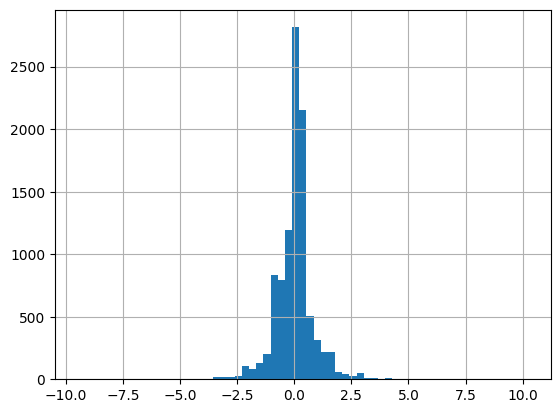

In [5]:
labelDf = dataDict['labelDf']
for value, count in labelDf.logBin.value_counts().items(): print(f'{value}: {count}')
labelDf.logBin.hist(bins=len(set(labelDf.logBin)))